---

title: "置换检验"
date: 2024-11-15
author: 郝鸿涛
slug: randomization-test
draft: false
toc: false
tags: 统计

---

假设我们现在有等长的两组数据：

In [79]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [80]:
g1 = np.array([37,42,12,32,97,68,14,29])
g2 = np.array([41,145,18,106,107,171,112,30])

我们想看看这两组数据均值是否存在显著差异。我们可以用 [独立样本 T 检验](https://hongtaoh.com/cn/2024/10/22/2-sample-t/#%E7%8B%AC%E7%AB%8B%E6%A0%B7%E6%9C%AC)。

我们这里样本很小，T 检验需要的正态分布如果不满足，结果可能不正确。

我们来介绍一种非参数检验：置换检验。

其原理很简单：如果两组数据均值一样，那么将两组数据合并然后随机分为两组，其平均值也应该一样。

我们来做一个实验：

In [81]:
n = 15
mu = 50
sd = 2
np.random.seed(35)
group1 = np.random.normal(loc=mu, scale=sd,size=n)
group2 = np.random.normal(loc=mu, scale=sd,size=n)
np.mean(group1), np.mean(group2)

(49.48339458939255, 50.063231656925424)

In [82]:
def randomization_test(g1,g2,n_iter):
    n = len(g1)
    true_diff = np.mean(g1) - np.mean(g2)
    diffs = []
    for i in range(int(n_iter)):
        group = np.concatenate([g1, g2])
        np.random.shuffle(group)
        group1 = group[:n]
        group2 = group[n:]
        diffs.append(np.mean(group1) - np.mean(group2))
    p_value = sum(1 for x in diffs if abs(x) >= abs(true_diff)) / n_iter

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.hist(diffs, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(true_diff, color='red', linestyle='dashed', linewidth=2, label=f"True Diff: {true_diff:.4f}")
    plt.title(f"Randomization Test: p-value = {p_value:.4f}")
    plt.xlabel("Difference of Means")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True, alpha=0.4)
    plt.show()
    
    return true_diff, p_value

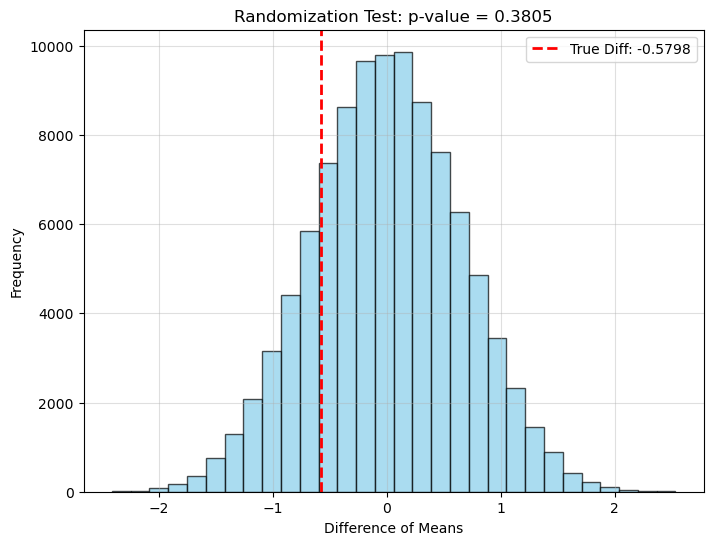

(-0.5798370675328712, 0.38045)

In [83]:
randomization_test(group1,group2,n_iter = 1e5)

我们这样计算 $p$-value: 所有两组差别中，绝对值比真是差别绝对着更大的差别所占的比例。

我们的假设 $H_0$ 是两组没有差别，即使有差别，那也是随机误差，而不是真实的两组差别。我们把两组合并，然后随机分配后，两组的差异应该很接近 0，当然也可能会有随机误差。

上图画出了这些随机误差的分布。我们看到，我们看到，这些所有的随机误差中，比真实误差更极端的例子不在少数，那也就说明真实误差其实并不罕见，因此我们无法推翻 $H_0$。

相反，如果 $p$ 值很小，小于 $0.05$，那我们可以说两组真实的差异非常罕见，那也就说明大概率不是误差导致的，而是两组真实的差异导致的。

我们来看一下最开始的两组数据：

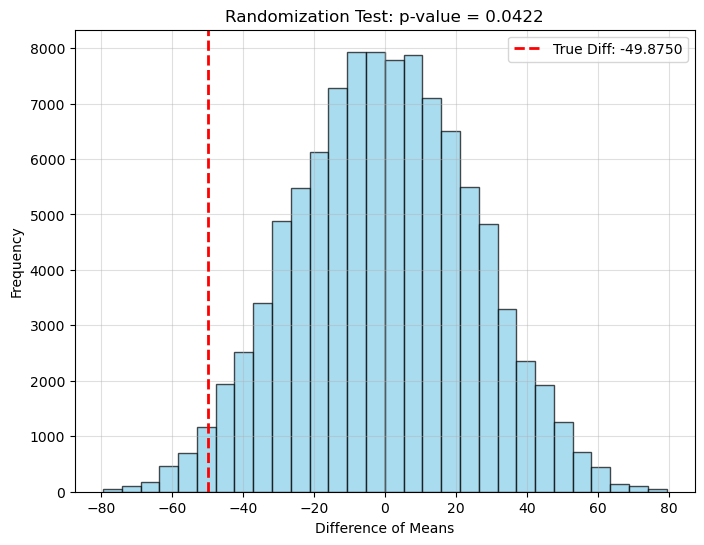

(-49.875, 0.04218)

In [84]:
randomization_test(g1,g2,n_iter = 1e5)

$p$ 值小于 0.05，因为我们无法接受 $H_0$，所以我们认为两组均值存在真实且显著的差异。